# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
file = ('C:/Users/Ariel/Desktop/01 DATA SCIENCE/Springboard/8.3 EDA Mini-Projects/EDA #1 Analyze Human Body Temp/1520467485_dsc_human_temp/EDA_human_temperature/data/human_body_temperature.csv')
df = pd.read_csv(file)

In [2]:
# Your work here.

# 1) Is the distribution of body temperatures normal? 

In [3]:
# Import plotting modules
import numpy as np
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

In [4]:
# Glance at the data
print(df.head(3), '\n')
print('length of dataframe:', len(df))

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0 

length of dataframe: 130


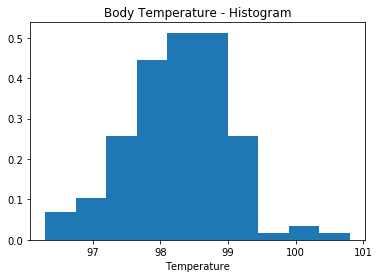

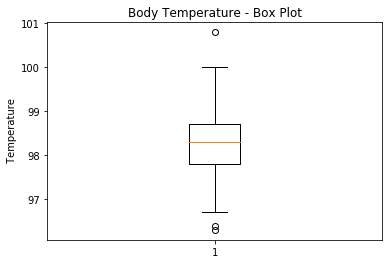

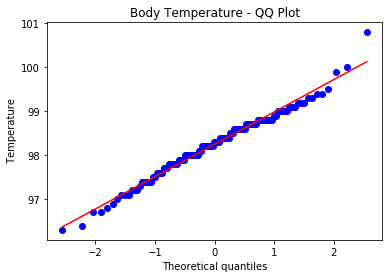

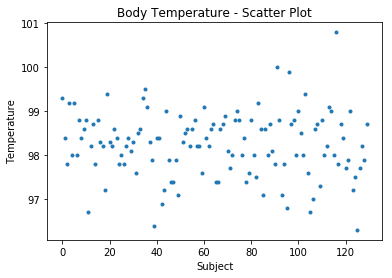

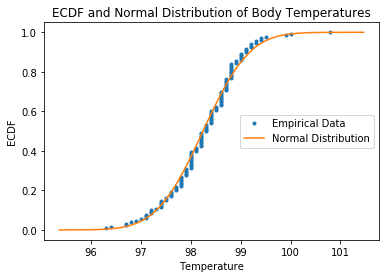

In [5]:
y = np.array(df.temperature)

# histogram
plt.hist(y, normed=True, bins = 10)
plt.title('Body Temperature - Histogram')
plt.xlabel('Temperature')
plt.show()

# boxplot
plt.boxplot(y)
plt.title('Body Temperature - Box Plot')
plt.ylabel(' Temperature')
plt.show()

# qq-plot
stats.probplot(y, dist="norm", plot=pylab)
plt.title('Body Temperature - QQ Plot')
plt.ylabel(' Temperature')
pylab.show()

# scatter plot
plt.plot(y, marker='.', linestyle='none')
plt.title('Body Temperature - Scatter Plot')
plt.xlabel('Subject')
plt.ylabel('Temperature')
plt.show()


# statistics needed to display Normal Distribution CDF 
mean = np.mean(df.temperature)
stand_dev = np.std(df.temperature)
np.random.seed(1000)
normal_distr = np.random.normal(mean, stand_dev, 100000)


# created ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


# ECDF and Normal Distribution Plot:
x_temp, y_temp = ecdf(df.temperature)
x_normal_distr, y_normal_distr = ecdf(normal_distr)

fig = plt.plot(x_temp, y_temp, marker='.', linestyle='none')
fig = plt.plot(x_normal_distr, y_normal_distr)

fig = plt.legend(('Empirical Data', 'Normal Distribution'), loc='center right')
fig = plt.xlabel('Temperature')
fig = plt.ylabel('ECDF')
fig = plt.title('ECDF and Normal Distribution of Body Temperatures')
plt.show()

The histogram and and box plot show that the data is right skewed. However, the QQ-Plot shows that the data still seems to be mostly normally distributed. In the ECDF and Normal Distribution graph we can see that the data closely follows the normal distribution. Therefore, it can be concluded that the data is normally distributed. 

# 2) Is the sample size large? Are the observations independent?  

The sample size of 130 is larger than the standard n >= 30. The data is also normally distributed which meets the requirement for the Central Limit Theorem to apply. Therefore, the sample size is large enough. 

Since each subject's normal body temperature is independent of anyone elses, the observations are independent. 

# 3) Is the true population mean really 98.6 degrees F? 

### 3a) Bootstrap Hypothesis Test:

Null-Hypothesis: our sample mean = 98.6 degrees

Alt-Hypothesis: our sample mean != 98.6 degrees

alpha= .05

In [6]:
# Establishing the seed
np.random.seed(100)

# Initialize array of replicates: bs_replicates
bs_replicates = np.empty(100000)

bs_sample = np.random.choice(df.temperature, size=len(df.temperature))

# Generate replicates
for i in range(len(bs_replicates)):
    bs_replicates[i] = np.mean(bs_sample)

# calculating the p-value
p = np.sum(bs_replicates == 98.6) / len(bs_replicates)

print("Bootstrap Mean:", np.mean(bs_replicates))
print("p-value:", p)


Bootstrap Mean: 98.2823076923
p-value: 0.0


#### 3a) Answer:

The p-value is smaller than the .05 meaning that there is strong evidence in favor of the alternate hypothesis. Therefore we reject the Null-Hypothesis that the our mean sample is equal to the generally accepted body temperature of 98.6 degrees. 

### 3b) Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 

I will use a one-sample test as we are comparing one sample (our data subjects) to the population (all humans). 

### 3c) In this situation, is it appropriate to use the t or z statistic? 

The z-stat requires the standard deviation of the population, which is unkown. Only the t-stat can be used as we only need the sample mean and sample standard deviation. 

### 3d) Now try using the other test. How is the result different? Why? 

In [7]:
t_stat = stats.ttest_1samp(df.temperature, 98.6)
print(t_stat)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


Here too the p-value is much smaller than .05. We reject the null hypothesis and accept the alternative hypothesis that the average body temperature is not equal to 98.6 degrees

# 4) Draw a small sample of size 10 from the data and repeat both frequentist tests. 

Which one is the correct one to use? 
    
What do you notice? What does this tell you about the difference in application of the t and z-statistic? 

Answer: Since the standard deviation of the population is unknown, only the t-statistic can be used.

In [8]:
# Establishing the seed
np.random.seed(100)

# Small sample of 10 from the data:
sample = np.random.choice(df.temperature, size=10)

t_stat_sample = stats.ttest_1samp(sample, 98.6)

print(t_stat_sample)

Ttest_1sampResult(statistic=-1.8244909216786074, pvalue=0.10137833233558072)


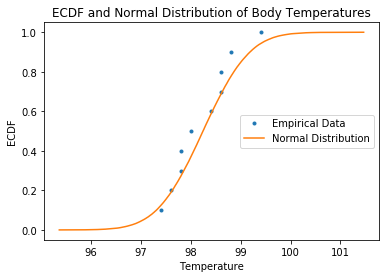

In [9]:
# ECDF and Normal Distribution Plot:
sample_x_temp, sample_y_temp = ecdf(sample)
x_normal_distr, y_normal_distr = ecdf(normal_distr)

fig = plt.plot(sample_x_temp, sample_y_temp, marker='.', linestyle='none')
fig = plt.plot(x_normal_distr, y_normal_distr)

fig = plt.legend(('Empirical Data', 'Normal Distribution'), loc='center right')
fig = plt.xlabel('Temperature')
fig = plt.ylabel('ECDF')
fig = plt.title('ECDF and Normal Distribution of Body Temperatures')
plt.show()

Answer: The p-value is greater than .05, we would not be able to reject the null hypothesis unlike before. This is due to the sample size of 10 not being large enough. It can be seen on the ECDF above that the small sample data does not follow the normal distribution close enough. Therefore, it is not normally destributed and the Central Limit Theorem does not apply. 

# 5) At what temperature should we consider someone's temperature to be "abnormal"? 
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. 

Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 

#### Bootstrap Confidence Intervals & Margin of Error

In [10]:
conf_intervals = stats.norm.interval(0.95, loc=np.mean(bs_replicates), scale=np.std(bs_replicates))

print('Lower Bound:', conf_intervals[0])
print('Upper Bound:',conf_intervals[1])
print('Margin of Error: +/-', (mean - conf_intervals[0]))

Lower Bound: 98.2823076923
Upper Bound: 98.2823076923
Margin of Error: +/- -0.0330769230769


#### Frequentist Approach Confidence Intervals & Margin of Error

In [11]:
stand_dev = np.std(df.temperature)
conf_intervals = stats.norm.interval(0.95, loc=mean, scale=stand_dev)

print('Lower Bound:', conf_intervals[0])
print('Upper Bound:',conf_intervals[1])
print('Margin of Error: +/-', (mean - conf_intervals[0]))

Lower Bound: 96.8177558267
Upper Bound: 99.6807057117
Margin of Error: +/- 1.43147494248


# 6) Is there a significant difference between males and females in normal temperature? 

What testing approach did you use and why? 

    Answer: I used a two-sample t-test as I'm comparing the mean of two, independent samples.

Write a story with your conclusion in the context of the original problem. 




Null-Hypothesis: mean temperature of males = mean temperature of females

Alt-Hypothesis: mean temperature of males != mean temperature of females

alpha= .05

In [12]:
males = df[df.gender == 'M']
females = df[df.gender == 'F']

print('Number of males:', len(males))
print('Number of females:', len(females))

Number of males: 65
Number of females: 65


In [13]:
# Getting temperatures per sex
m_temp = males.temperature
f_temp = females.temperature

# T-stats
t_stat_2 = stats.ttest_ind(m_temp, f_temp)

print('Male Mean Body Temperature:', np.mean(m_temp))
print('Female Mean Body Temperature:', np.mean(f_temp),'\n')
print(t_stat_2)


Male Mean Body Temperature: 98.1046153846154
Female Mean Body Temperature: 98.39384615384613 

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)


The p-value is smaller than .05 meaning that there is strong evidence in favor of the alternate hypothesis. Therefore we reject the Null-Hypothesis that the normal body temperautre for men is equal that of women.

## Conclusion

This analysis found that the mean body temperature for humans is not 98.6 degree Farenheit. Instead, it is 98.28 degrees with a 95% confience interval of 1.4315. 

Furthermore, it was shown that the mean body temperature for men and women are different. The mean body temperature for men is 98.1 degrees and 98.39 degrees for women. 